In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

In [2]:
result_files = glob.glob("../src/dist/output/analysis/*.json")
result_data = []
files = []
for file in result_files:
    with open(file, "r") as f:
        result_data.append(json.load(f))
        files.append(file)
result_files = files

In [3]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        filename = "/" +filename+".json"
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [4]:
def get_node_load_data(simulationData):
    return simulationData["node-load-list"]

In [5]:
# [file][node][time]の配列に変換
def convert_node_load(data):
    load_data_list = []
    for d in data:
        node_data = get_node_load_data(d)
        load_data = []
        for j in range(len(node_data[0])):
            load_data_per_node = []
            for i in range(len(node_data)):
                load_data_per_node.append(node_data[i][j])
            load_data.append(load_data_per_node)  
        load_data_list.append(load_data)   
    return load_data_list

In [6]:
def get_user_connection_data(simulationData):
    return simulationData["user-connection-list"]

In [7]:
# 複数のtimestepデータから箱ひげ図として表示する関数
def convert_and_plot_as_boxplot(timeStepDataList, show_files, title="boxplot", xlabel="File Name", ylabel="Value"):
    data = []
    for timeStepData in timeStepDataList:
        data.append(np.array(timeStepData))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(data, labels=show_files, showfliers=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

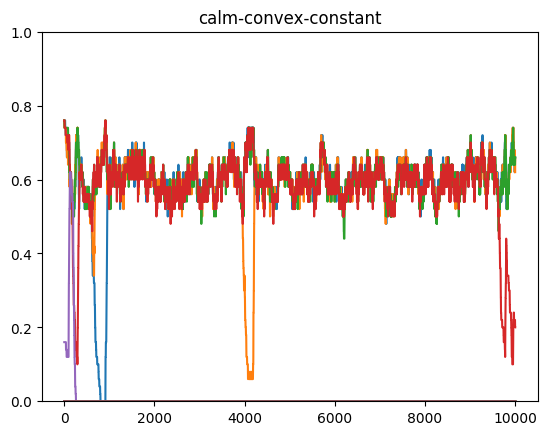

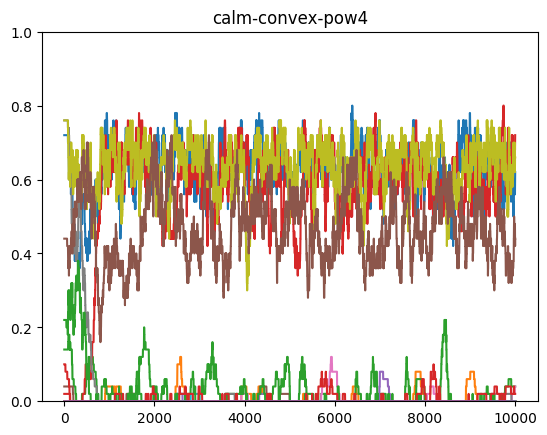

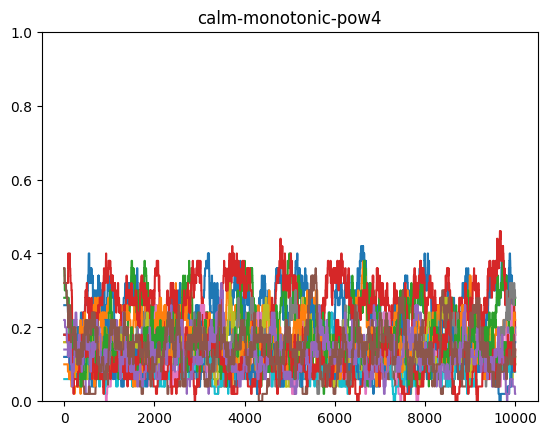

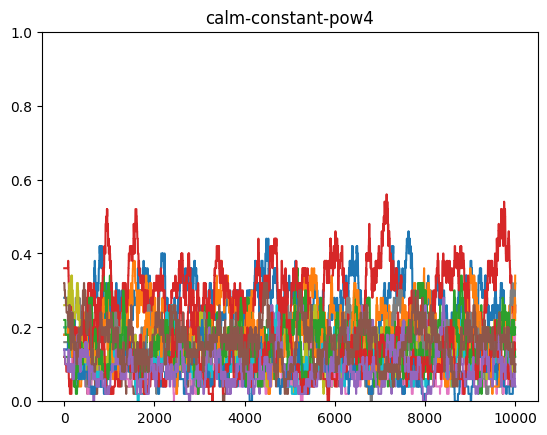

In [15]:
# ノードの負荷を表示

scenario = "calm"
# scenario = "middle"
# scenario = "busy"
# show_files = ["convex-constant", "convex-pow4", "convex-pow1", "monotonic-constant" ,"monotonic-pow4",  "monotonic-pow1", "constant-pow4"]
show_files = ["convex-constant", "convex-pow4","monotonic-pow4", "constant-pow4"]
show_files = [scenario + "-" + file for file in show_files]

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

calm-convex-constant ave: 0.5971688497816885
calm-convex-pow4 ave: 0.4532205089014908
calm-monotonic-pow4 ave: 0.15020592940705935
calm-constant-pow4 ave: 0.1501168466486685


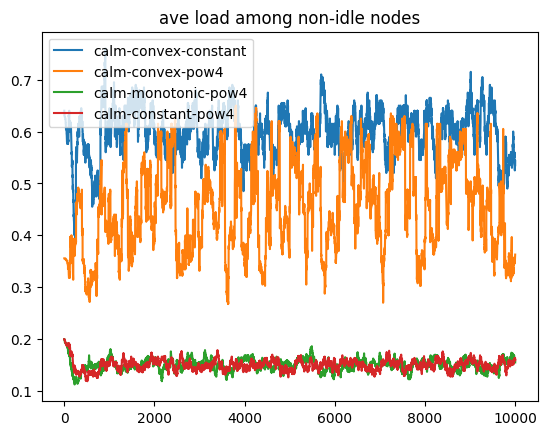

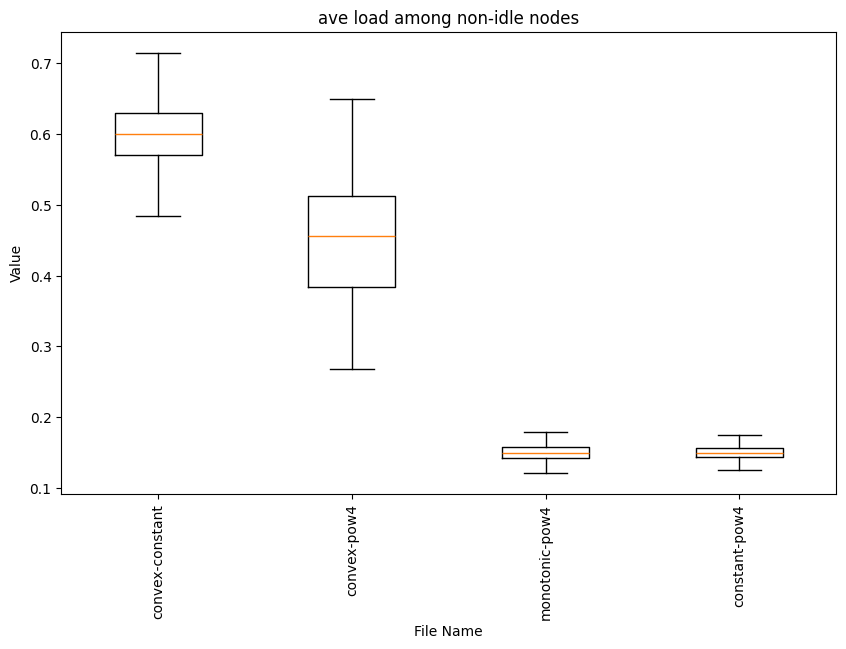

convex-constant max: 0.76
convex-pow4 max: 0.8
monotonic-pow4 max: 0.46
constant-pow4 max: 0.56


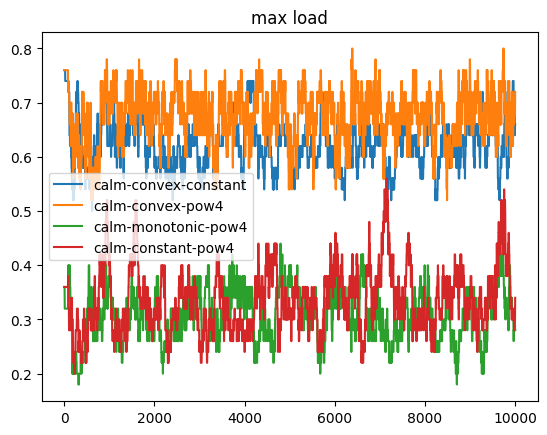

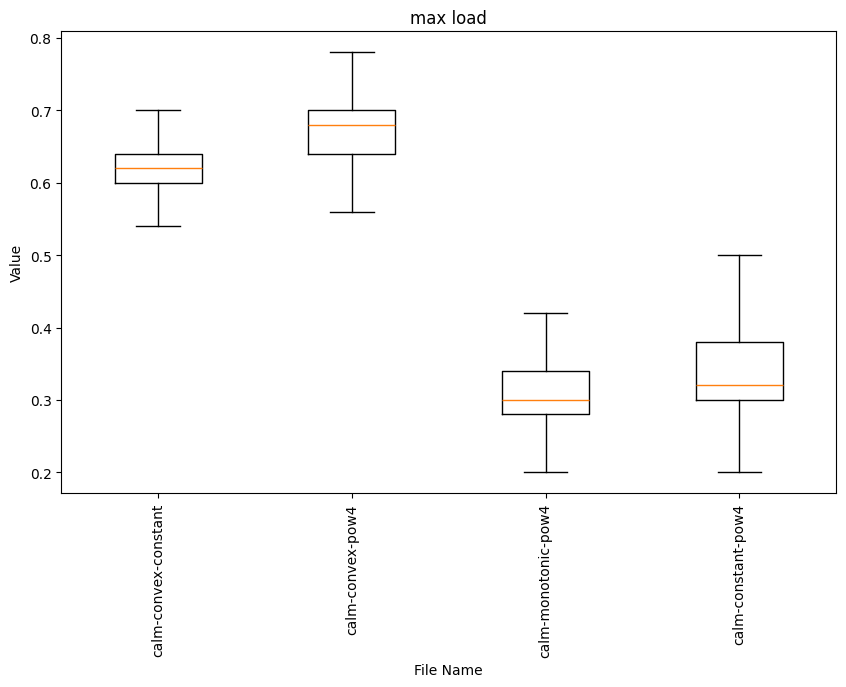

In [18]:
# 負荷の比較
scenario = "calm"
# scenario = "middle"
# scenario = "busy"
# show_settings = ["convex-constant", "convex-pow4", "convex-pow1", "monotonic-constant" ,"monotonic-pow4",  "monotonic-pow1", "constant-pow4"]
show_settings = ["convex-constant", "convex-pow4","monotonic-pow4", "constant-pow4"]

show_files = [scenario + "-" + file for file in show_settings]

data = get_data_by_filenames(show_files)

ave_node_load_list = []
max_node_load_list = []

for i,d in enumerate(data): 
    ave_node_load = []
    max_node_load = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        ave = 0
        max = 0
        non_idle_num = 0
        for load in timeStepData:
            if load != 0:
                non_idle_num += 1
            ave += load
            if max < load:
                max = load
        ave /= non_idle_num
        ave_node_load.append(ave)
        max_node_load.append(max)
    ave_node_load_list.append(ave_node_load)
    max_node_load_list.append(max_node_load)
for i,ave in enumerate(ave_node_load_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave load among non-idle nodes")    
plt.legend()
plt.show()

convert_and_plot_as_boxplot(ave_node_load_list, show_settings, "ave load among non-idle nodes")

for i,max in enumerate(max_node_load_list):
    plt.plot(max, label= show_files[i])
    print(show_settings[i], "max:", np.max(max))
plt.title("max load")
plt.legend()
plt.show()

convert_and_plot_as_boxplot(max_node_load_list, show_files, "max load")

calm-convex-constant ave num of idle: 11.985301469853015
calm-convex-pow4 ave num of idle: 10.537346265373463
calm-monotonic-pow4 ave num of idle: 0.0357964203579642
calm-constant-pow4 ave num of idle: 0.043195680431956804


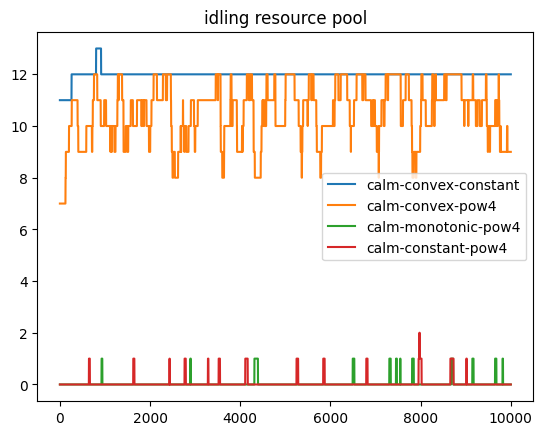

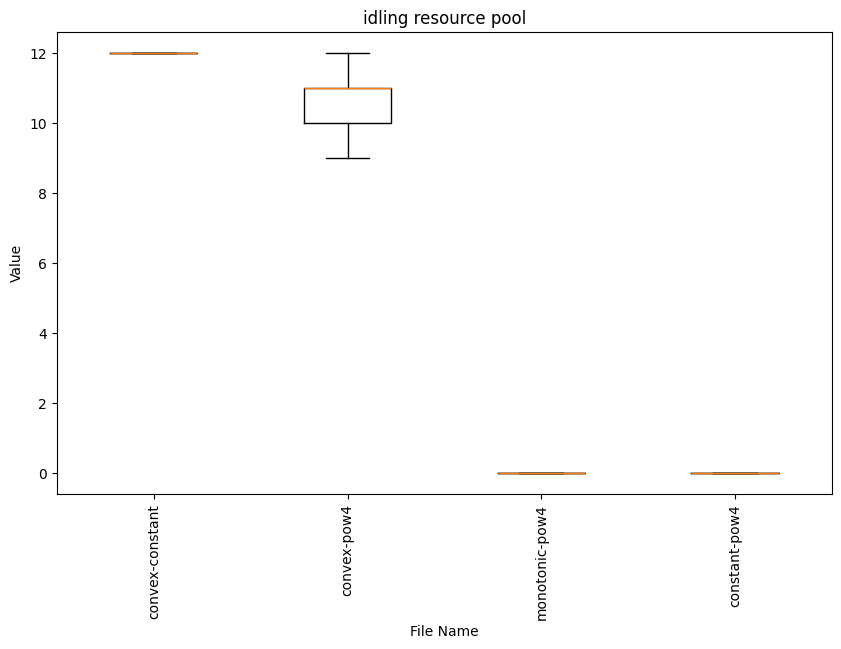

In [19]:
# アイドルリソース数を表示
scenario = "calm"
# scenario = "middle"
# scenario = "busy"
# show_settings = ["convex-constant", "convex-pow4", "convex-pow1", "monotonic-constant" ,"monotonic-pow4",  "monotonic-pow1", "constant-pow4"]
show_settiings = ["convex-constant", "convex-pow4","monotonic-pow4", "constant-pow4"]

show_files = [scenario + "-" + file for file in show_settings]


data = get_data_by_filenames(show_files)
idling_resource_num_list = []
for i,d in enumerate(data): 
    idling_resource_num = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        idling_resource_sum = 0
        for load in timeStepData:
            if load == 0:
                idling_resource_sum +=1
        idling_resource_num.append(idling_resource_sum)
    plt.plot(idling_resource_num, label=show_files[i])
    idling_resource_num_list.append(idling_resource_num)
    print(show_files[i], "ave num of idle:", np.average(idling_resource_num))
plt.title("idling resource pool")    
plt.legend()
plt.show()

convert_and_plot_as_boxplot(idling_resource_num_list, show_settings, "idling resource pool")

calm-convex-constant migrate/step: 0.6195380461953804
calm-convex-pow4 migrate/step: 0.31086891310868914
calm-monotonic-pow4 migrate/step: 0.48205179482051796
calm-constant-pow4 migrate/step: 0.48865113488651135


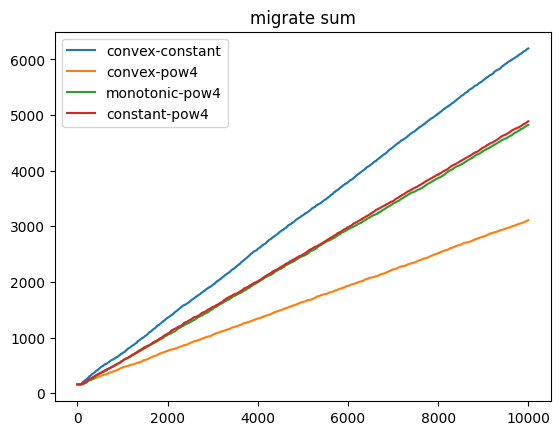

In [20]:
# サーバ切り替え回数の比較
scenario = "calm"
# scenario = "middle"
# scenario = "busy"
# show_settings = ["convex-constant", "convex-pow4", "convex-pow1", "monotonic-constant" ,"monotonic-pow4",  "monotonic-pow1", "constant-pow4"]
show_settiings = ["convex-constant", "convex-pow4","monotonic-pow4", "constant-pow4"]
show_files = [scenario + "-" + file for file in show_settings]


data = get_data_by_filenames(show_files)
for i, d in enumerate(data):
    user_connection_data = get_user_connection_data(d)
    migrate_sum_list = []
    migrate_sum = 0
    connect_node_list = [-1] * len(user_connection_data[0])
    for timeStepData in user_connection_data:
        for j in range(len(timeStepData)):
            if (connect_node_list[i] == -1) or (connect_node_list[j] == timeStepData[j]):
                pass
            else:
                migrate_sum +=1
            connect_node_list[j] = timeStepData[j]
        migrate_sum_list.append(migrate_sum)
    print(show_files[i], "migrate/step:", migrate_sum_list[len(migrate_sum_list)-1]/len(migrate_sum_list))
    plt.plot(migrate_sum_list, label=show_settings[i])
plt.title("migrate sum")    
plt.legend()
plt.show()

calm-convex-constant ave: 138.17496073170216
calm-convex-pow4 ave: 61.60244526822513
calm-monotonic-pow4 ave: 35.27283180862042
calm-constant-pow4 ave: 34.502985650740776


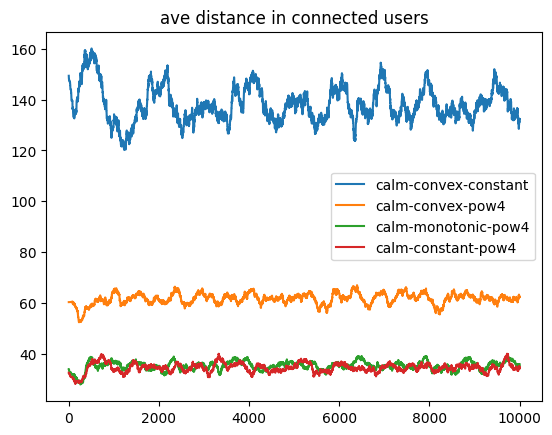

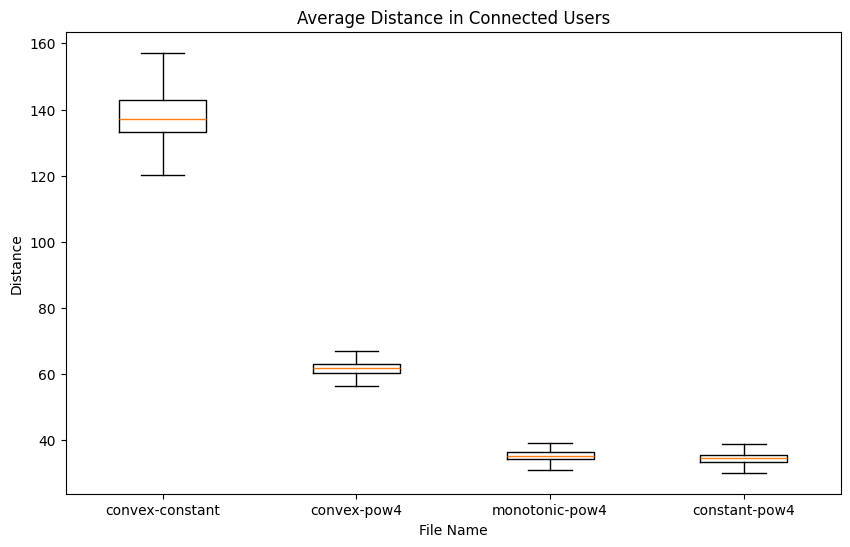

calm-convex-constant max: 335.58410863767114
calm-convex-pow4 max: 121.48377104601855
calm-monotonic-pow4 max: 84.57421912258086
calm-constant-pow4 max: 84.14825953145728


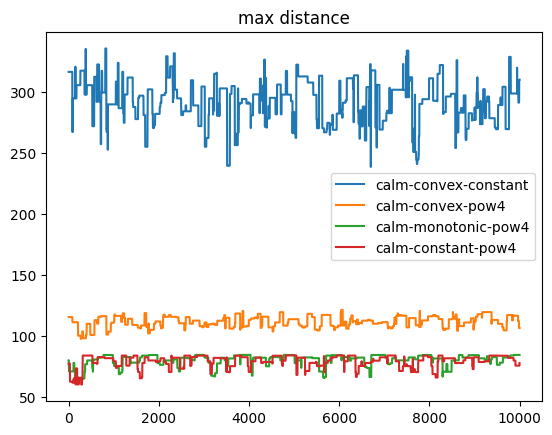

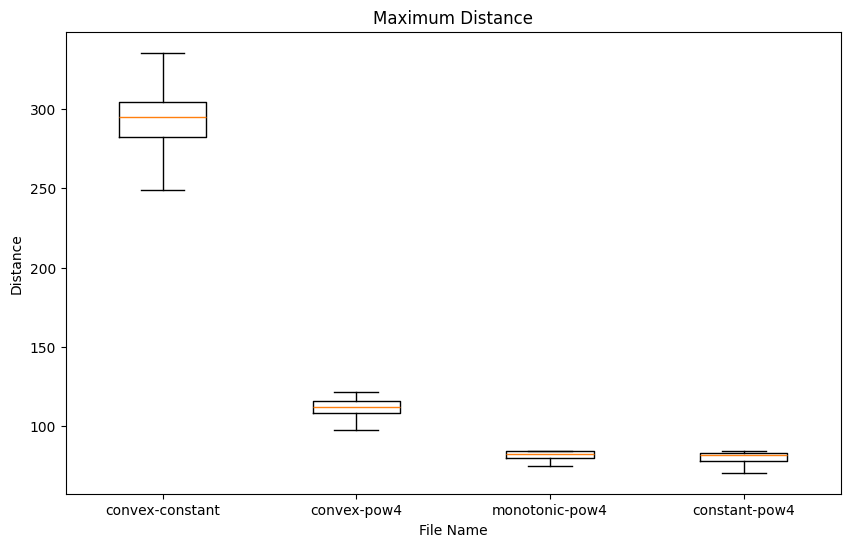

calm-convex-constant far user rate: 0.5725724474532925
calm-convex-pow4 far user rate: 4.408553394693914e-05
calm-monotonic-pow4 far user rate: 0.0
calm-constant-pow4 far user rate: 0.0


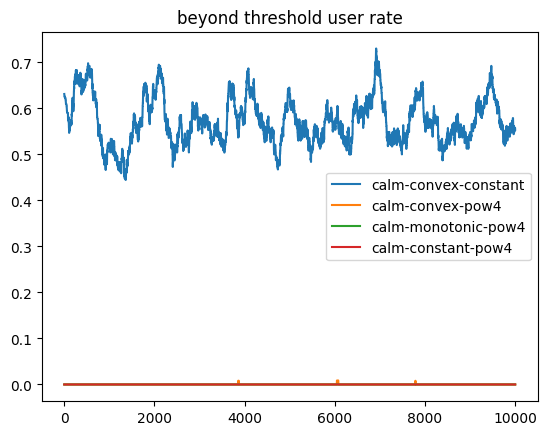

Text(0, 0.5, 'Rate')

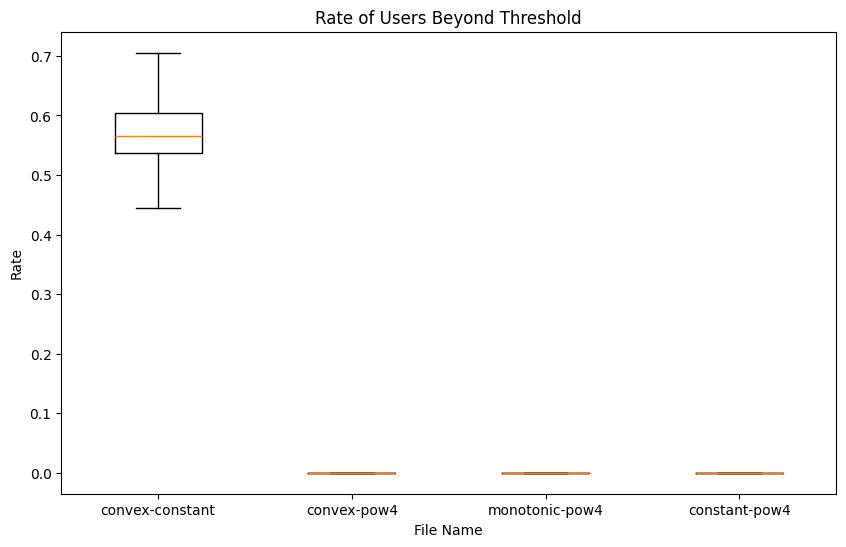

In [21]:
# 割り当て距離の比較
scenario = "calm"
# scenario = "middle"
# scenario = "busy"
# show_settings = ["convex-constant", "convex-pow4", "convex-pow1", "monotonic-constant" ,"monotonic-pow4",  "monotonic-pow1", "constant-pow4"]
show_settiings = ["convex-constant", "convex-pow4","monotonic-pow4", "constant-pow4"]
show_files = [scenario + "-" + file for file in show_settings]


data = get_data_by_filenames(show_files)

ave_distance_list = []
max_distance_list = []
far_user_rate_list = []

for i,d in enumerate(data): 
    ave_distance = []
    max_distance = []
    far_rate = []
    user_connection_data = d["user-connection-distance-list"]
    threshold = d["network-distance-threshold"]
    for timeStepData in user_connection_data:
        ave = 0
        max = 0
        far = 0
        connection_num = 0
        for distance in timeStepData:
            if distance >= 0:
                connection_num += 1
            ave += distance
            if max < distance:
                max = distance
            if distance > threshold:
                far += 1
        ave /= connection_num
        far /= connection_num
        ave_distance.append(ave)
        max_distance.append(max)
        far_rate.append(far)
    ave_distance_list.append(ave_distance)
    max_distance_list.append(max_distance)
    far_user_rate_list.append(far_rate)

#平均
for i,ave in enumerate(ave_distance_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave distance in connected users")    
plt.legend()
plt.show()

# 平均距離の箱ひげ図
ave_distance_data = []
for ave in ave_distance_list:
    ave_distance_data.append(np.array(ave))

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ave_distance_data, labels=show_settings, showfliers=False)
ax.set_title("Average Distance in Connected Users")
ax.set_xlabel("File Name")
ax.set_ylabel("Distance")
plt.show()

#最大
for i,max in enumerate(max_distance_list):
    plt.plot(max, label= show_files[i])
    print(show_files[i], "max:", np.max(max))
plt.title("max distance")
plt.legend()
plt.show()

# 最大距離の箱ひげ図
max_distance_data = []
for max_dist in max_distance_list:
    max_distance_data.append(np.array(max_dist))

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(max_distance_data, labels=show_settings, showfliers=False)
ax.set_title("Maximum Distance")
ax.set_xlabel("File Name")
ax.set_ylabel("Distance")
plt.show()

# しきい値を超える割合
for i,rate in enumerate(far_user_rate_list):
    plt.plot(rate, label= show_files[i])
    print(show_files[i], "far user rate:", np.average(rate))
plt.title("beyond threshold user rate")
plt.legend()
plt.show()

# しきい値を超える割合の箱ひげ図
far_user_rate_data = []
for rate in far_user_rate_list:
    far_user_rate_data.append(np.array(rate))

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(far_user_rate_data, labels=show_settings, showfliers=False)
ax.set_title("Rate of Users Beyond Threshold")
ax.set_xlabel("File Name")
ax.set_ylabel("Rate")